.dicom, .dcm

In [1]:
# Download and unzip example DICOM files
!pip install --upgrade gdown
!gdown --fuzzy 1PFg0H3nXOyXK8PUyLDIZhkgLHQVEP6kO
!unzip dicom_file.zip

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1PFg0H3nXOyXK8PUyLDIZhkgLHQVEP6kO
To: /content/dicom_file.zip
100% 18.6M/18.6M [00:00<00:00, 138MB/s] 
Archive:  dicom_file.zip
   creating: dicom_file/
  inflating: __MACOSX/._dicom_file   
  inflating: dicom_file/02.dcm       
  inflating: dicom_file/01.dcm       
  inflating: dicom_file/00.dcm       
  inflating: dicom_file/Icon         
  inflating: __MACOSX/dicom_file/._Icon  


In [2]:
# install pydicom
!pip install -U pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.6 MB/s eta 0:00:00


In [3]:
import pydicom
import matplotlib.pyplot as plt
import os # path

FOLDER_PATH = './dicom_file'

In [4]:
# file 1
data_path = os.path.join(FOLDER_PATH, '00.dcm') # .dcm .dicom
print(data_path)

./dicom_file/00.dcm


In [5]:
# Read File
ds = pydicom.dcmread(data_path)
print(type(ds))
ds

<class 'pydicom.dataset.FileDataset'>


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20111229'
(0008, 0030) Stud

In [6]:
# Read image data
img = ds.pixel_array

type(img)

numpy.ndarray

In [7]:
img.shape # (4084, 3328)

(4084, 3328)

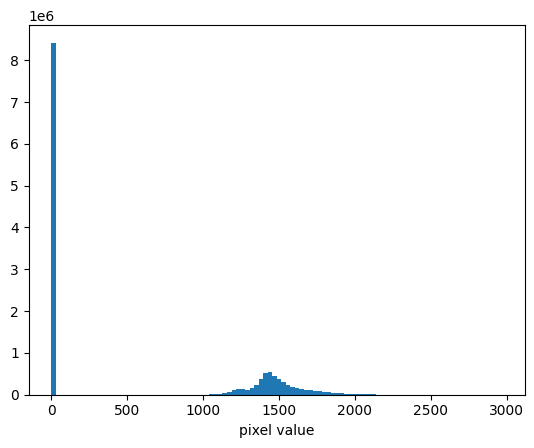

In [8]:
# Pixel value histogram
plt.xlabel('pixel value')
plt.hist(img.ravel(), bins=100) # ravel(flatten): reshape(-1)
plt.show()

In [9]:
img.max(), img.min()

(2970, 0)

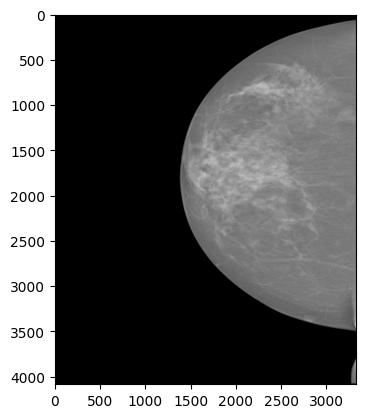

In [10]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [11]:
# get pixel HU value
img[2000, 2500]

1553

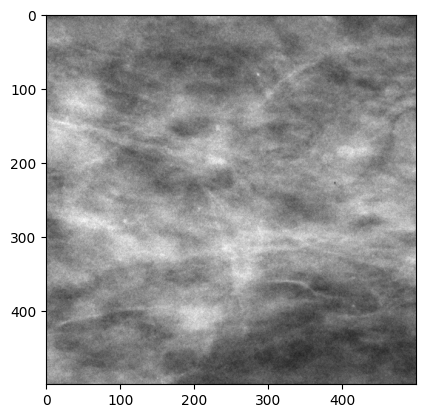

In [12]:
# Get patch iamge
patch = img[1500:2000, 2000:2500]
plt.imshow(patch, cmap=plt.cm.gray)

In [13]:
# Print all tag and value except 'Pixel Data', 'File Meta Information Version'
dont_print = ['Pixel Data', 'File Meta Information Version']
for element in ds:
    if element.name not in dont_print:
        print(element.tag)
        print('tag name: ', element.name)
        print('tag value: ', element.value)
        print(f'keyword: {element.keyword} \n')


(0008, 0016)
tag name:  SOP Class UID
tag value:  1.2.840.10008.5.1.4.1.1.7
keyword: SOPClassUID 

(0008, 0018)
tag name:  SOP Instance UID
tag value:  1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
keyword: SOPInstanceUID 

(0008, 0020)
tag name:  Study Date
tag value:  
keyword: StudyDate 

(0008, 0023)
tag name:  Content Date
tag value:  20111229
keyword: ContentDate 

(0008, 0030)
tag name:  Study Time
tag value:  
keyword: StudyTime 

(0008, 0033)
tag name:  Content Time
tag value:  212728.687004
keyword: ContentTime 

(0008, 0050)
tag name:  Accession Number
tag value:  
keyword: AccessionNumber 

(0008, 0060)
tag name:  Modality
tag value:  OT
keyword: Modality 

(0008, 0064)
tag name:  Conversion Type
tag value:  WSD
keyword: ConversionType 

(0008, 0090)
tag name:  Referring Physician's Name
tag value:  
keyword: ReferringPhysicianName 

(0010, 0010)
tag name:  Patient's Name
tag value:  
keyword: PatientName 

(0010, 0020)
tag name:  Patient ID
tag value:  


In [14]:
# 取出特定 tag
print(ds[0x28, 0x10].value) # by address 16進位 0~9ABCDEF
print(ds.Rows) # by Keyword

4084
4084


In [ ]:
# address 16進位 0~9ABCDEF
0x28
print(16*2 + 8) # 0, 1, 2 ~ 9, A, B , C D E F

In [15]:
ds[0x28, 0x11].value, ds.Columns

(3328, 3328)

# Update Value

In [16]:
# De-indentification 去識別化
print('before: ', ds.PatientID) # ''
# update value
ds.PatientID = 'Who am I ?????'

print('after: ', ds.PatientID) # Who am I ?????

before:  
after:  Who am I ?????


## Save file

In [17]:
save_path = './update.dcm'
save_path

'./update.dcm'

In [18]:
ds.save_as(save_path)

In [19]:
ds2 = pydicom.read_file(save_path)

In [20]:
ds2.PatientID

'Who am I ?????'